In [ ]:
!pip install gymnasium[atari] ale-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.8.1
    Uninstalling ale-py-0.8.1:
      Successfully uninstalled ale-py-0.8.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
!pip install gym[atari]

  Using cached ale_py-0.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached ale_py-0.8.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.7 MB)
  Attempting uninstall: ale-py
    Found existing installation: ale-py 0.11.0
    Uninstalling ale-py-0.11.0:
      Successfully uninstalled ale-py-0.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires ale-py>=0.10.1, but you have ale-py 0.8.1 which is incompatible.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
!pip install "gym[atari,accept-rom-license]"

In [ ]:
!pip install autorom

In [ ]:
!AutoROM --accept-license

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.11/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.

I own a license to these Atari 2600 ROMs.
I agree to not distribute these ROMs and wish to proceed: [Y/n]: y
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/adventure.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/air_raid.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/alien.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/amidar.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/assault.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/asterix.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/asteroids.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/atlantis.bin
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/atlantis2.bin
Installed /usr/local/lib/python3.11/dist-packages/

In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
dopamine-rl 4.1.2 requires ale-py>=0.10.1, but you have ale-py 0.8.1 which is incompatible.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [ ]:
!pip install --upgrade numpy tensorboard --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.
dopamine-rl 4.1.2 requires ale-py>=0.10.1, but you have ale-py 0.8.1 which is incompatible.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
import numpy
import tensorboard

print("NumPy version:", numpy.__version__)
print("TensorBoard version:", tensorboard.__version__)


NumPy version: 2.0.2
TensorBoard version: 2.19.0


In [ ]:
import os, glob, random, math, time
from pathlib import Path
from collections import deque

import gym
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

# ──────────────────── hyper-parameters ────────────────────
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

cfg = dict(
    seed=0,
    total_frames=5_000_000,
    rollout_len=2048,
    gamma=0.99,
    gae_lambda=0.95,
    ppo_epochs=4,
    batch_size=256,
    clip_eps=0.2,
    lr=2.5e-4,
    lr_decay=True,
    value_coef=0.5,
    entropy_coef=0.05,
    max_grad_norm=0.5,
    save_every=250_000,
    log_every=10_000,
    ckpt_dir="checkpoints_ppo",
    env_id="ALE/Pong-v5"
)

# seeds & device
torch.manual_seed(cfg['seed'])
np.random.seed(cfg['seed'])
random.seed(cfg['seed'])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
class Gray84(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.observation_space = gym.spaces.Box(0, 255, (84, 84, 1), np.uint8)

    def observation(self, obs):
        obs = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
        obs = cv2.resize(obs, (84, 84), interpolation=cv2.INTER_AREA)
        return obs[..., None]

class Stack(gym.Wrapper):
    def __init__(self, env, k=4):
        super().__init__(env)
        self.k = k
        self.frames = deque(maxlen=k)
        h, w, c = env.observation_space.shape
        self.observation_space = gym.spaces.Box(0, 255, (h, w, c*k), np.uint8)

    def reset(self, **kw):
        obs, info = self.env.reset(**kw)
        for _ in range(self.k):
            self.frames.append(obs)
        return self._get(), info

    def step(self, act):
        obs, r, term, trunc, info = self.env.step(act)
        self.frames.append(obs)
        return self._get(), r, term, trunc, info

    def _get(self):
        return np.concatenate(list(self.frames), axis=-1)

In [ ]:
class ActorCritic(nn.Module):
    def __init__(self, n_actions):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(4, 32, 8, 4), nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2), nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1), nn.ReLU(),
            nn.Flatten()
        )
        with torch.no_grad():
            dummy = torch.zeros(1, 4, 84, 84)
            conv_out = self.conv(dummy).shape[-1]
        self.fc = nn.Sequential(nn.Linear(conv_out, 512), nn.ReLU())
        self.pi = nn.Linear(512, n_actions)
        self.v = nn.Linear(512, 1)
        for m in self.modules():
            if isinstance(m, (nn.Conv2d, nn.Linear)):
                nn.init.orthogonal_(m.weight, gain=math.sqrt(2))
                nn.init.constant_(m.bias, 0)
        nn.init.orthogonal_(self.pi.weight, gain=0.01)

    def forward(self, x):
        x = x.float() / 255.0
        feat = self.fc(self.conv(x))
        return self.pi(feat), self.v(feat).squeeze(-1)

In [ ]:
class RolloutBuffer:
    def __init__(self, size, obs_shape, device):
        self.size = size
        self.device = device
        self.obs = torch.empty((size, *obs_shape), dtype=torch.uint8)
        self.actions = torch.empty(size, dtype=torch.int64)
        self.rewards = torch.empty(size, dtype=torch.float32)
        self.dones = torch.empty(size, dtype=torch.float32)
        self.values = torch.empty(size, dtype=torch.float32)
        self.log_probs = torch.empty(size, dtype=torch.float32)
        self.ptr = 0

    def store(self, o, a, r, d, v, logp):
        self.obs[self.ptr] = torch.from_numpy(o)
        self.actions[self.ptr] = a
        self.rewards[self.ptr] = r
        self.dones[self.ptr] = d
        self.values[self.ptr] = v
        self.log_probs[self.ptr] = logp
        self.ptr += 1

    def is_full(self):
        return self.ptr == self.size

    def compute_returns_adv(self, last_value, gamma, lam):
        vs = torch.cat([self.values, last_value.view(1)])
        adv = torch.zeros_like(self.rewards)
        gae = 0
        for t in reversed(range(self.size)):
            delta = self.rewards[t] + gamma * vs[t+1] * (1 - self.dones[t]) - vs[t]
            gae = delta + gamma * lam * (1 - self.dones[t]) * gae
            adv[t] = gae
        ret = adv + self.values
        adv = (adv - adv.mean()) / (adv.std() + 1e-8)
        self.advantages = adv.to(self.device)
        self.returns = ret.to(self.device)

    def get_loader(self, batch_size):
        idx = torch.randperm(self.size)
        for start in range(0, self.size, batch_size):
            i = idx[start:start+batch_size]
            yield (
                self.obs[i].to(self.device).permute(0,3,1,2),
                self.actions[i].to(self.device),
                self.log_probs[i].to(self.device),
                self.advantages[i],
                self.returns[i]
            )

    def clear(self):
        self.ptr = 0


In [ ]:
class PPOAgent:
    def __init__(self, env):
        self.env = env
        obs_shape = env.observation_space.shape
        n_act = env.action_space.n
        self.net = ActorCritic(n_act).to(device)
        self.opt = optim.Adam(self.net.parameters(), lr=cfg['lr'], eps=1e-5)
        self.buffer = RolloutBuffer(cfg['rollout_len'], obs_shape, device)
        self.frame = 0
        self.episode = 0
        self.ep_rewards = []
        self.loss_log = {'policy': [], 'value': [], 'entropy': [], 'total': []}

    @torch.no_grad()
    def act(self, obs):
        obs_t = torch.from_numpy(obs).permute(2,0,1).unsqueeze(0).to(device)
        logits, val = self.net(obs_t)
        dist = Categorical(logits=logits)
        act = dist.sample()
        return act.item(), dist.log_prob(act).item(), val.item()

    def update(self, last_val):
        self.buffer.compute_returns_adv(torch.tensor(last_val), cfg['gamma'], cfg['gae_lambda'])
        pl, vl, ent = [], [], []
        for _ in range(cfg['ppo_epochs']):
            for o, a, old_logp, adv, ret in self.buffer.get_loader(cfg['batch_size']):
                logits, val = self.net(o)
                dist = Categorical(logits=logits)
                logp = dist.log_prob(a)
                ratio = (logp - old_logp).exp()
                surr1 = ratio * adv
                surr2 = torch.clamp(ratio, 1 - cfg['clip_eps'], 1 + cfg['clip_eps']) * adv
                pg_loss = -torch.min(surr1, surr2).mean()
                v_loss = F.mse_loss(val, ret)
                entropy = dist.entropy().mean()
                loss = pg_loss + cfg['value_coef'] * v_loss - cfg['entropy_coef'] * entropy
                self.opt.zero_grad()
                loss.backward()
                nn.utils.clip_grad_norm_(self.net.parameters(), cfg['max_grad_norm'])
                self.opt.step()
                pl.append(pg_loss.item())
                vl.append(v_loss.item())
                ent.append(entropy.item())
        self.loss_log['policy'].append(np.mean(pl))
        self.loss_log['value'].append(np.mean(vl))
        self.loss_log['entropy'].append(np.mean(ent))
        self.loss_log['total'].append(np.mean(pl) + cfg['value_coef']*np.mean(vl) - cfg['entropy_coef']*np.mean(ent))
        self.buffer.clear()


In [ ]:
# Checkpointing
os.makedirs(cfg['ckpt_dir'], exist_ok=True)

def save_ckpt(agent):
    fn = os.path.join(cfg['ckpt_dir'], f"ppo_{agent.frame//1000:07d}k.pth")
    torch.save({"frame": agent.frame, "episode": agent.episode, "rewards": agent.ep_rewards, "network": agent.net.state_dict(), "optimizer": agent.opt.state_dict()}, fn)
    print(f"✅ checkpoint saved → {fn}")

def load_ckpt(agent):
    files = sorted(glob.glob(os.path.join(cfg['ckpt_dir'], "ppo_*k.pth")))
    if not files:
        print("🔄 no checkpoint – starting fresh")
        return
    ckpt = torch.load(files[-1], map_location=device)
    agent.frame = ckpt["frame"]
    agent.episode = ckpt["episode"]
    agent.ep_rewards = ckpt["rewards"]
    agent.net.load_state_dict(ckpt["network"])
    agent.opt.load_state_dict(ckpt["optimizer"])
    print(f"🔄 resumed from {files[-1]}")

In [ ]:
import numpy as np
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

In [ ]:
# Training
import torch.optim as optim
env = Stack(Gray84(gym.make(cfg['env_id'], render_mode=None)), 4)
agent = PPOAgent(env)
load_ckpt(agent)
obs, _ = env.reset()
ep_reward = 0

while agent.frame < cfg['total_frames']:
    act, logp, val = agent.act(obs)
    next_obs, rew, term, trunc, _ = env.step(act)
    done = term or trunc
    agent.buffer.store(obs, act, rew, float(done), val, logp)
    obs = next_obs
    ep_reward += rew
    agent.frame += 1
    if agent.buffer.is_full():
        with torch.no_grad():
            _, last_val = agent.net(torch.from_numpy(obs).permute(2,0,1).unsqueeze(0).to(device))
        agent.update(last_val.cpu())
        if cfg['lr_decay']:
            frac = 1 - agent.frame / cfg['total_frames']
            for g in agent.opt.param_groups:
                g['lr'] = cfg['lr'] * frac
    if done:
        agent.episode += 1
        agent.ep_rewards.append(ep_reward)
        obs, _ = env.reset()
        ep_reward = 0
    if agent.frame % cfg['log_every'] == 0:
        avg20 = np.mean(agent.ep_rewards[-20:]) if agent.ep_rewards else 0
        print(f"[{agent.frame:,}] ep {agent.episode} | avg(20) {avg20:+.2f} | policy {agent.loss_log['policy'][-1]:.4f} value {agent.loss_log['value'][-1]:.4f} entropy {agent.loss_log['entropy'][-1]:.4f}")
    if agent.frame % cfg['save_every'] == 0:
        save_ckpt(agent)

save_ckpt(agent)
env.close()


🔄 no checkpoint – starting fresh


<ipython-input-31-5ecc1014560c>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.buffer.compute_returns_adv(torch.tensor(last_val), cfg['gamma'], cfg['gae_lambda'])


[10,000] ep 10 | avg(20) -20.00 | policy -0.0022 value 0.1315 entropy 1.7525
[20,000] ep 22 | avg(20) -20.40 | policy -0.0029 value 0.0917 entropy 1.7610
[30,000] ep 32 | avg(20) -20.25 | policy -0.0018 value 0.0911 entropy 1.7841
[40,000] ep 43 | avg(20) -20.20 | policy -0.0026 value 0.0574 entropy 1.7602
[50,000] ep 54 | avg(20) -20.40 | policy -0.0000 value 0.0659 entropy 1.7703
[60,000] ep 65 | avg(20) -20.35 | policy -0.0027 value 0.0544 entropy 1.7436
[70,000] ep 77 | avg(20) -20.60 | policy -0.0004 value 0.0419 entropy 1.6955
[80,000] ep 88 | avg(20) -20.60 | policy 0.0001 value 0.0478 entropy 1.7573
[90,000] ep 98 | avg(20) -20.35 | policy -0.0005 value 0.0798 entropy 1.7785
[100,000] ep 108 | avg(20) -20.20 | policy -0.0004 value 0.0726 entropy 1.7870
[110,000] ep 119 | avg(20) -20.30 | policy -0.0050 value 0.0486 entropy 1.7674
[120,000] ep 130 | avg(20) -20.20 | policy -0.0036 value 0.0573 entropy 1.7778
[130,000] ep 141 | avg(20) -20.20 | policy -0.0042 value 0.0746 entropy

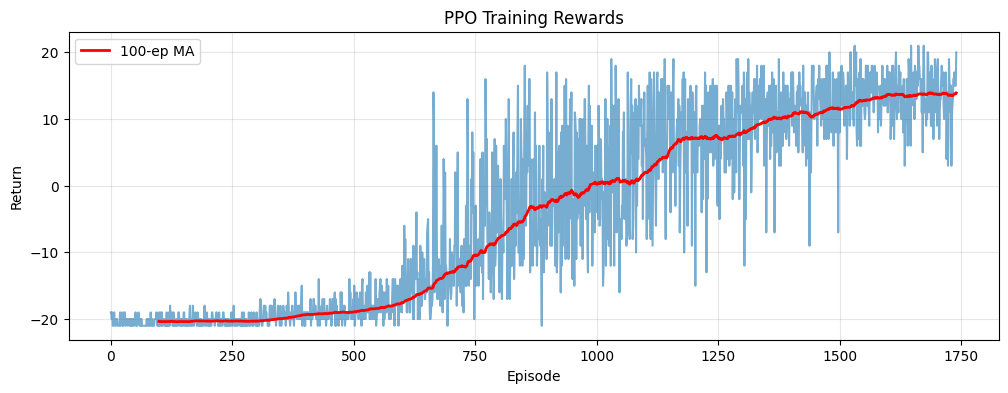

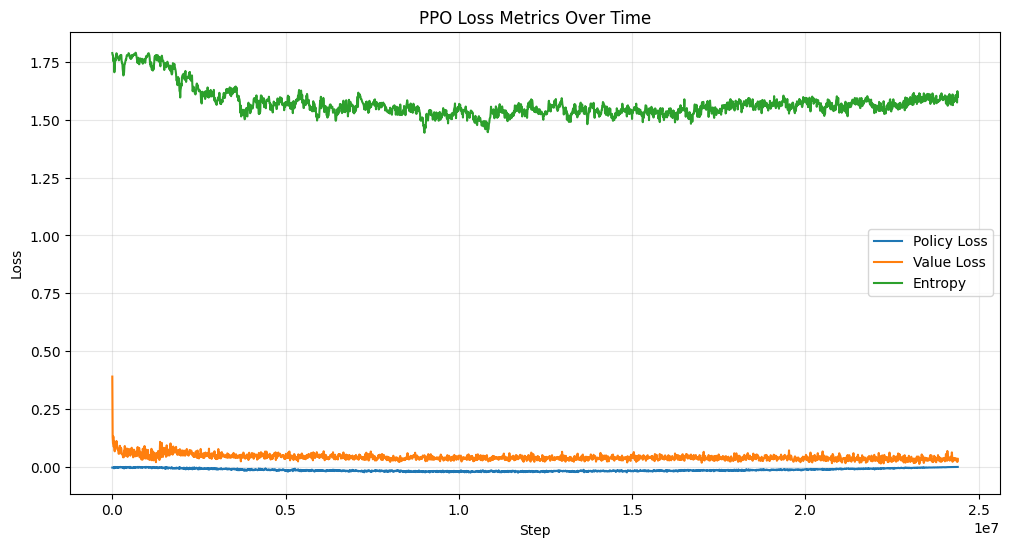

Final greedy return: -21.0


✅ saved video → ppo_pong.mp4


In [ ]:
# Plotting
plt.figure(figsize=(12,4))
plt.plot(agent.ep_rewards, alpha=0.6)
if len(agent.ep_rewards) > 100:
    ma = np.convolve(agent.ep_rewards, np.ones(100)/100, 'valid')
    plt.plot(range(99, len(agent.ep_rewards)), ma, lw=2, c='r', label='100-ep MA')
plt.xlabel('Episode'); plt.ylabel('Return'); plt.legend(); plt.grid(alpha=0.3)
plt.title('PPO Training Rewards'); plt.show()

steps = np.arange(len(agent.loss_log['policy'])) * cfg['log_every']
plt.figure(figsize=(12,6))
plt.plot(steps, agent.loss_log['policy'], label='Policy Loss')
plt.plot(steps, agent.loss_log['value'], label='Value Loss')
plt.plot(steps, agent.loss_log['entropy'], label='Entropy')
plt.xlabel('Step'); plt.ylabel('Loss'); plt.legend(); plt.grid(alpha=0.3)
plt.title('PPO Loss Metrics Over Time'); plt.show()

# 🎥 record deterministic episode
import imageio
vid_env = Stack(Gray84(gym.make(cfg['env_id'], render_mode='rgb_array')), 4)
frames, done, total = [], False, 0
obs, _ = vid_env.reset()
agent.net.eval()
with torch.no_grad():
    while not done:
        frames.append(vid_env.render())
        logits, _ = agent.net(torch.from_numpy(obs).permute(2,0,1).unsqueeze(0).to(device).float()/255.)
        act = torch.argmax(logits, dim=-1).item()
        obs, r, term, trunc, _ = vid_env.step(act)
        done = term or trunc
        total += r
print("Final greedy return:", total)
imageio.mimsave("ppo_pong.mp4", frames, fps=30)
print("✅ saved video → ppo_pong.mp4")


In [ ]:
import torch
import gym
import cv2
import numpy as np
import imageio
import torch.optim as optim


# Load your saved checkpoint
checkpoint_path = "/ppo_0005000k.pth"  # <-- update this to your actual path
ckpt = torch.load(checkpoint_path, map_location=device)

# Rebuild agent and load weights
env = gym.make(cfg['env_id'], render_mode='rgb_array')
env = Stack(Gray84(env), 4)
agent = PPOAgent(env)
agent.net.load_state_dict(ckpt['network'])

# Prepare environment
state, _ = env.reset()
done = False
frames = []
total_reward = 0

# Set model to eval mode
agent.net.eval()

while not done:
    with torch.no_grad():
        logits, _ = agent.net(torch.from_numpy(state).permute(2,0,1).unsqueeze(0).to(device))
        action = torch.argmax(logits, dim=-1).item()
    state, reward, term, trunc, _ = env.step(action)
    done = term or trunc
    total_reward += reward
    frame = env.render()
    frames.append(frame)

env.close()
print(f'🏆 Final greedy episode reward: {total_reward}')

# Save as video
output_path = 'ppo_final.mp4'
h, w, _ = frames[0].shape
video = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (w, h))
for f in frames:
    video.write(cv2.cvtColor(f, cv2.COLOR_RGB2BGR))
video.release()

print(f'✅ Saved final video → {output_path}')

🏆 Final greedy episode reward: 21.0
✅ Saved final video → ppo_final.mp4
